# Explore here

### Paso 1: Cargar el conjunto de datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
total_data= pd.read_csv('../data/Aquifer_Petrignano.csv')
total_data

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [186]:
print(total_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB
None


### Paso 2: Construcción y análisis de la serie temporal

In [187]:
total_data = total_data[total_data.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
total_data = total_data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4199 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P25              4172 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Volume_C10_Petrignano                 4198 non-null   float64
 5   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB
None


In [188]:
total_data.columns = ['fecha', 'lluviosidad', 'profundidad', 'temperatura', 'volumen_de_drenado', 'hidrometria_de_rio']

In [189]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               4199 non-null   object 
 1   lluviosidad         4199 non-null   float64
 2   profundidad         4172 non-null   float64
 3   temperatura         4199 non-null   float64
 4   volumen_de_drenado  4198 non-null   float64
 5   hidrometria_de_rio  4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB
None


In [190]:
total_data.isnull().sum().sort_values(ascending=False)

profundidad           27
volumen_de_drenado     1
fecha                  0
lluviosidad            0
temperatura            0
hidrometria_de_rio     0
dtype: int64

#### La variable objetivo es la profundidad: 'profundidad'

In [191]:
total_data['fecha'] = pd.to_datetime(total_data['fecha'], format = '%d/%m/%Y')
new_data = total_data.set_index('fecha')
new_data.head(5)

,lluviosidad,profundidad,temperatura,volumen_de_drenado,hidrometria_de_rio
fecha,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


#### Graficando cada columna

C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_5692\3421584838.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_5692\3421584838.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_5692\3421584838.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_

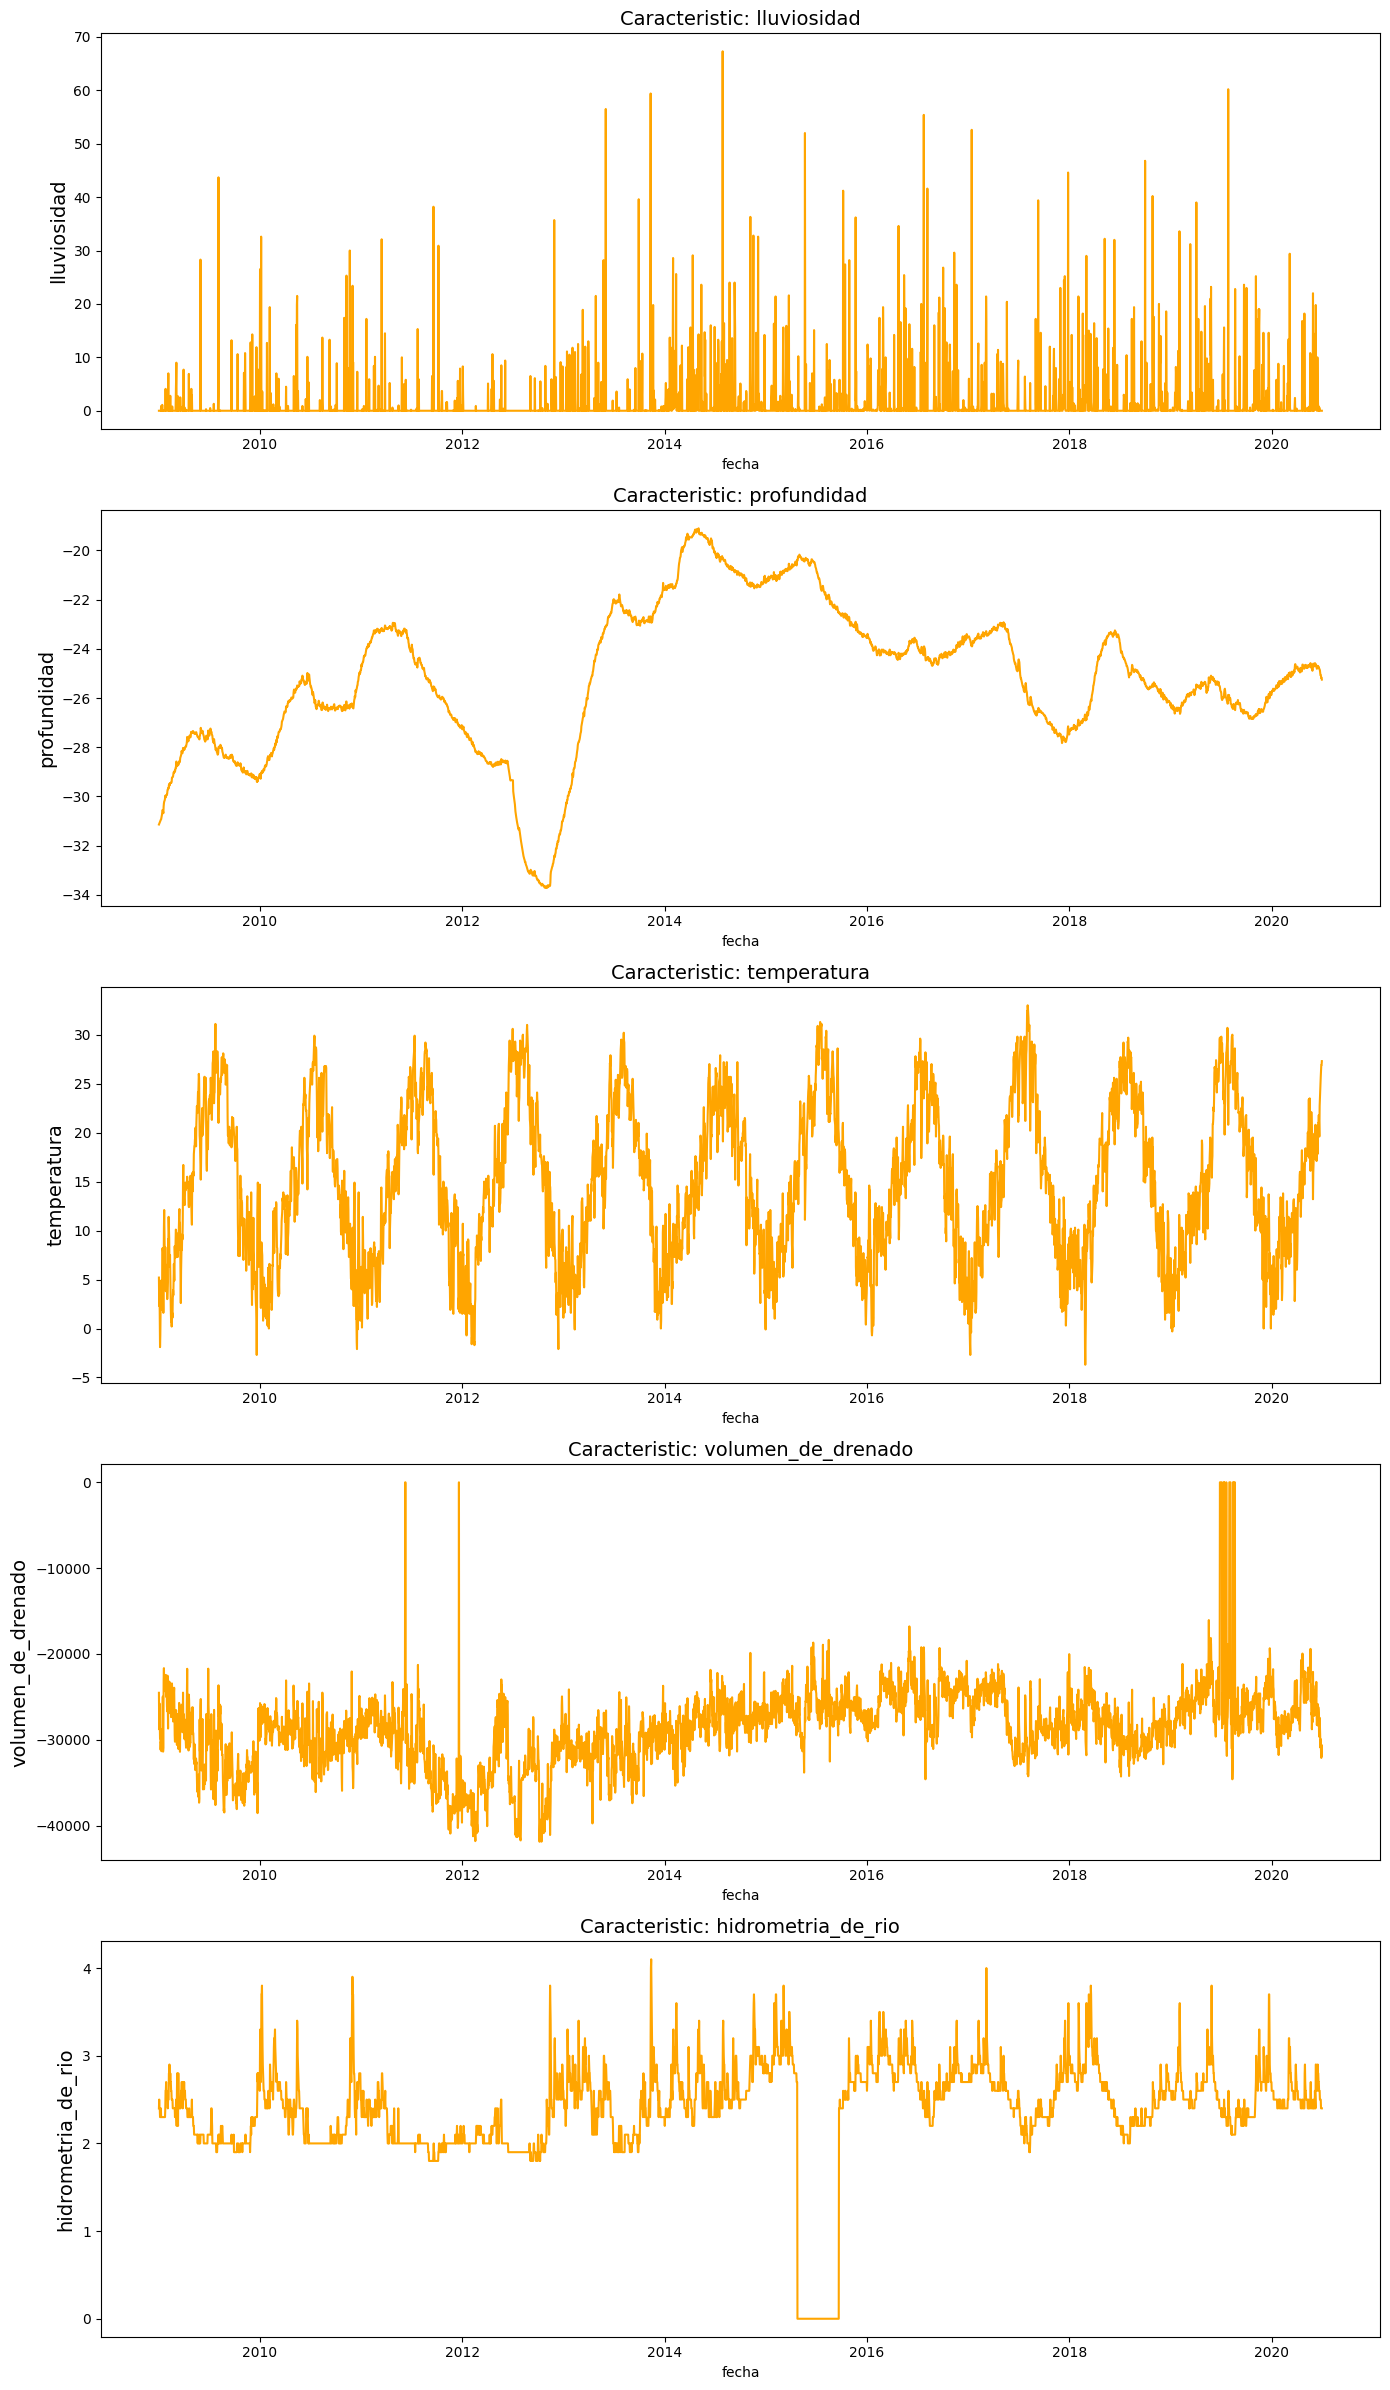

In [192]:
fig, ax = plt.subplots(5, 1, figsize = (14, 24))

for i, column in enumerate(total_data.drop('fecha', axis=1).columns):
    sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
    ax[i].set_title('Caracteristic: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

plt.tight_layout()
plt.show()

In [193]:
print(total_data.describe())

                     fecha  lluviosidad  profundidad  temperatura  \
count                 4199  4199.000000  4172.000000  4199.000000   
mean   2014-10-01 00:00:00     1.556633   -25.182534    15.030293   
min    2009-01-01 00:00:00     0.000000   -33.710000    -3.700000   
25%    2011-11-16 12:00:00     0.000000   -26.860000     8.800000   
50%    2014-10-01 00:00:00     0.000000   -25.170000    14.700000   
75%    2017-08-15 12:00:00     0.100000   -23.270000    21.400000   
max    2020-06-30 00:00:00    67.300000   -19.100000    33.000000   
std                    NaN     5.217923     2.945074     7.794871   

       volumen_de_drenado  hidrometria_de_rio  
count         4198.000000         4199.000000  
mean        -28669.156619            2.372517  
min         -41890.176000            0.000000  
25%         -31082.832000            2.100000  
50%         -28389.744000            2.400000  
75%         -26042.904000            2.700000  
max              0.000000            4.100

#### La estadistica de la profundidad contiene valores, N/A por lo que vamos a sustituir esos  Valores con el Promedio de la Estadistica

In [194]:
mean_value = total_data['profundidad'].mean()
total_data['profundidad'] = total_data['profundidad'].fillna(mean_value)


In [195]:
mean_value = total_data['volumen_de_drenado'].mean()
total_data['volumen_de_drenado'] = total_data['volumen_de_drenado'].fillna(mean_value)

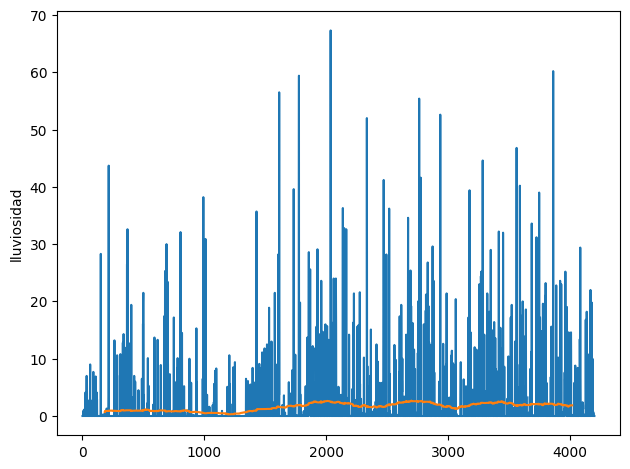

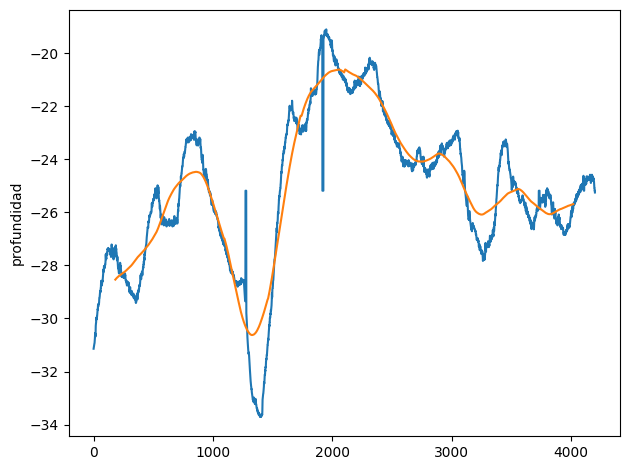

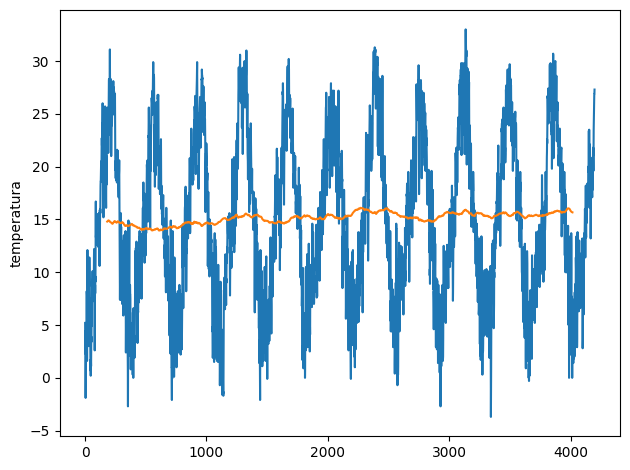

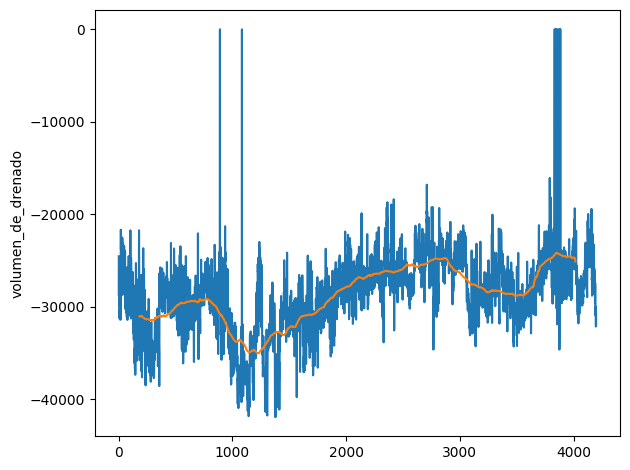

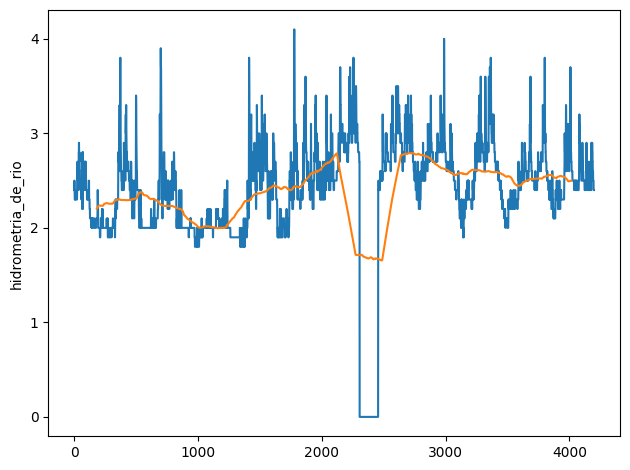

In [196]:
def graf_tendencia(data):
    decomposition = seasonal_decompose(data, model='additive', period=365)
    trend = decomposition.trend
    sns.lineplot(data)
    sns.lineplot(data = trend)
    plt.tight_layout()
    plt.show()


for i, column in enumerate(total_data.drop('fecha', axis=1).columns):
    data  = total_data[column]
    graf_tendencia(data)

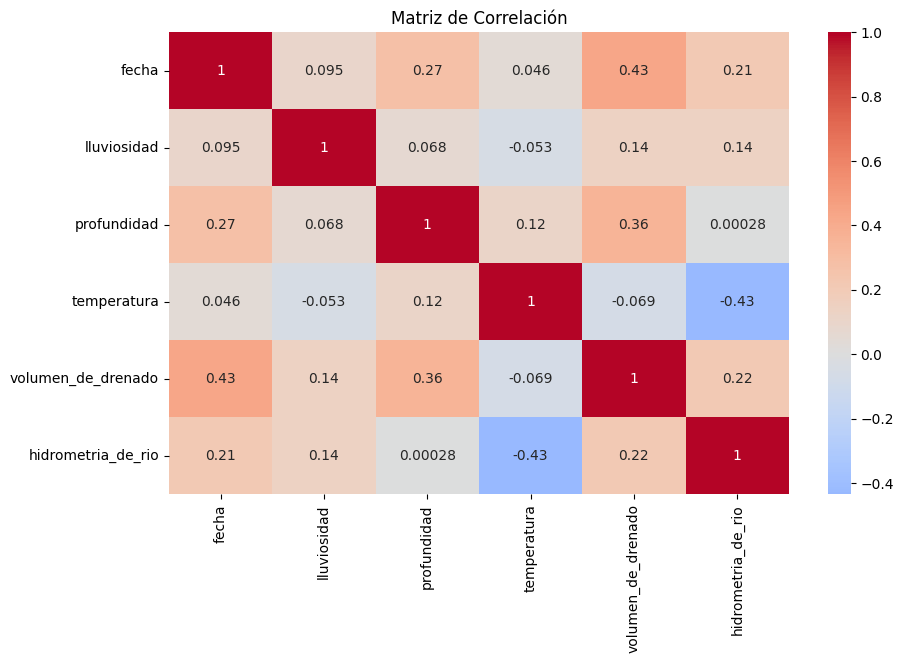

In [197]:

plt.figure(figsize=(10, 6))
sns.heatmap(
    total_data.corr(),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Matriz de Correlación')
plt.show()

#### Prueba de Dickey-Fuller para observar la estacionalidad de la Variable Objetivo

In [198]:
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data['profundidad'])

Dickey-Fuller test results:


Test Statistic                   -2.090045
p-value                           0.248536
#Lags Used                       29.000000
Number of Observations Used    4169.000000
Critical Value (1%)              -3.431920
Critical Value (5%)              -2.862234
Critical Value (10%)             -2.567139
dtype: float64

#### Gracicos con pruebas de "Dickey-Fuller" sobre cada Variable.

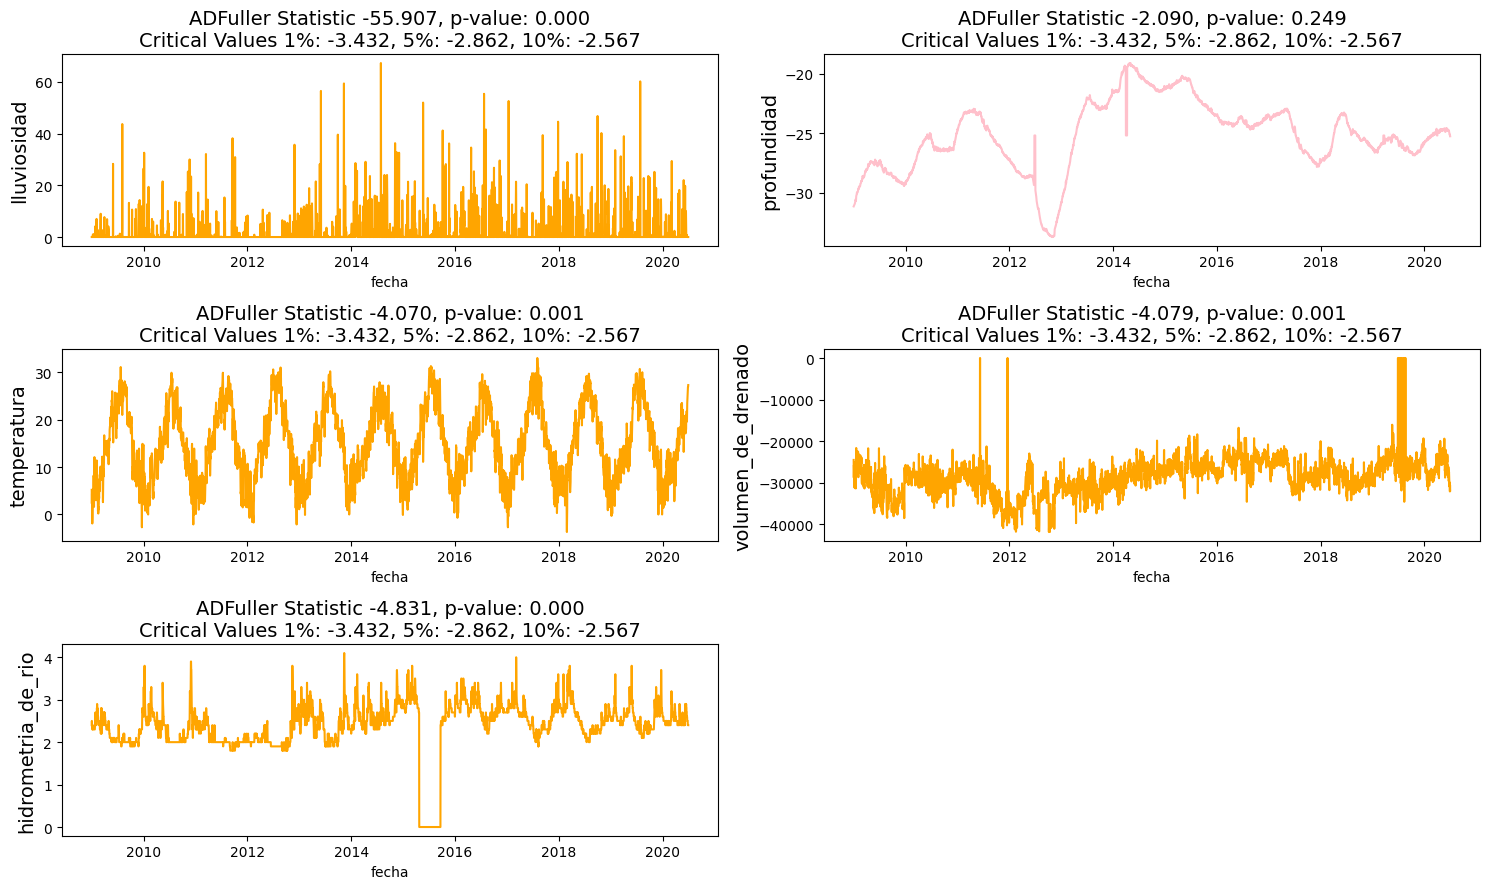

In [199]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'orange' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'green'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'blue'
    else:
        linecolor = 'pink'
    sns.lineplot(x=total_data['fecha'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADFuller Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller(total_data['lluviosidad'].values, 'lluviosidad', ax[0, 0])
visualize_adfuller(total_data['temperatura'].values, 'temperatura', ax[1, 0])
visualize_adfuller(total_data['profundidad'].values, 'profundidad', ax[0, 1])
visualize_adfuller(total_data['volumen_de_drenado'].values, 'volumen_de_drenado', ax[1, 1])
visualize_adfuller(total_data['hidrometria_de_rio'].values, 'hidrometria_de_rio', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

### Importante:

####  No se rechaza H0, que indica "No estacionalidad" por lo que al ser "No es estacionaria" → Necsito transformarla (por ejemplo, diferenciación o log-transform) antes de usarla en modelos que asumen estacionariedad.

In [200]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
total_data['profundidad_diff'] = total_data['profundidad'].diff()
mean_value = total_data['profundidad_diff'].mean()
total_data['profundidad_diff'] = total_data['profundidad_diff'].fillna(mean_value)

In [201]:

# Aplicar la prueba de Dickey-Fuller
resultado_adf = adfuller(total_data['profundidad_diff'])

print('ADF Statistic:', resultado_adf[0])
print('p-value:', resultado_adf[1])
for key, value in resultado_adf[4].items():
    print(f'Critical Value ({key}): {value}')

# Interpretación simple:
if resultado_adf[1] < 0.05:
    print("La serie diferenciada es estacionaria (rechazamos H0)")
else:
    print("La serie diferenciada no es estacionaria (no rechazamos H0)")


ADF Statistic: -11.067592652037783
p-value: 4.6395127179718565e-20
Critical Value (1%): -3.4319191438819407
Critical Value (5%): -2.8622333615468443
Critical Value (10%): -2.567139082403142
La serie diferenciada es estacionaria (rechazamos H0)


###  Paso 3: Entrenamiento del modelo ARIMA

In [205]:
# Estoy usando un modelomodelo SARIMAX (Seasonal ARIMA con variables exógenas).

# Primero defino las variables endógena y exógenas
endog = total_data['profundidad_diff']
exog = total_data[['lluviosidad', 'temperatura', 'volumen_de_drenado', 'hidrometria_de_rio']]
# Segundo, defino el modelo SARIMAX
# Aquí p,d,q los puedes ajustar (prueba con (1,0,0) para empezar, ya que ya diferenciamos, d = 0)
model = SARIMAX(endog, exog=exog, order=(1,0,0))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       profundidad_diff   No. Observations:                 4199
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1487.631
Date:                Mon, 11 Aug 2025   AIC                          -2963.262
Time:                        02:01:59   BIC                          -2925.206
Sample:                             0   HQIC                         -2949.805
                               - 4199                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
lluviosidad            0.0022      0.001      2.272      0.023       0.000       0.004
temperatura           -0.0007      0.001     -0.947      0.344      -0.002       0.001
volumen_de_drenado  

c:\4geeks\Tareas\env\venv-perceptron\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Paso 4: Predicción y evaluación

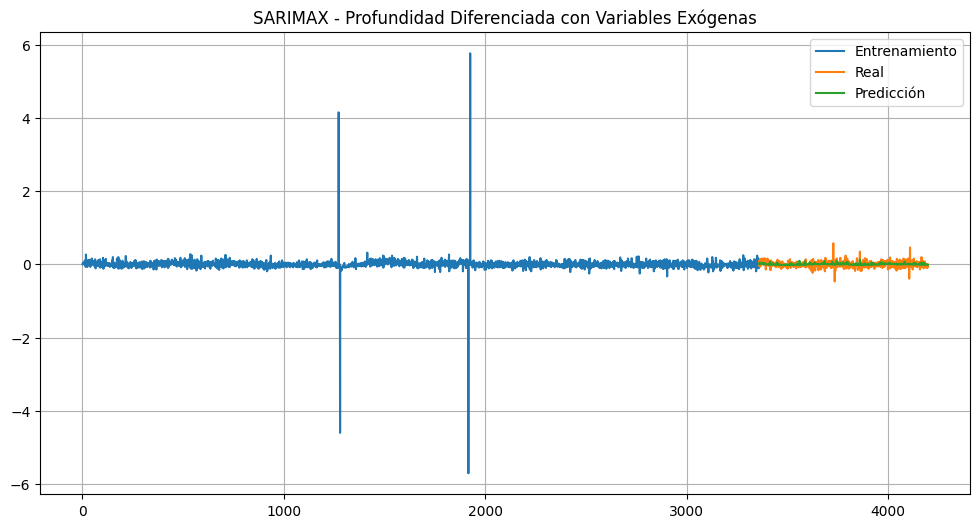

In [214]:

# División train/test (80% train, 20% test)
train_size = int(len(total_data) * 0.8)

# Variables endógena (target)
train_endog = total_data['profundidad_diff'][:train_size]
test_endog = total_data['profundidad_diff'][train_size:]

# Variables exógenas (predictoras)
exog_vars = ['lluviosidad', 'temperatura', 'volumen_de_drenado', 'hidrometria_de_rio']
train_exog = total_data[exog_vars][:train_size]
test_exog = total_data[exog_vars][train_size:]

# Hacer predicciones para el periodo de test
forecast = model_fit.predict(start=train_size, end=len(total_data)-1, exog=test_exog)

# Visualizar resultados
plt.figure(figsize=(12,6))
plt.plot(total_data.index[:train_size], train_endog, label='Entrenamiento')
plt.plot(total_data.index[train_size:], test_endog, label='Real')
plt.plot(total_data.index[train_size:], forecast, label='Predicción')
plt.legend()
plt.grid()
plt.title('SARIMAX - Profundidad Diferenciada con Variables Exógenas')
plt.show()


In [215]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(test_endog, forecast)
mse = mean_squared_error(test_endog, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_endog - forecast) / test_endog)) * 100

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.2f}%')
r2 = r2_score(test_endog, forecast)
print(f'R²: {r2:.4f}')


MAE: 0.0506
MSE: 0.0050
RMSE: 0.0709
MAPE: inf%
R²: 0.0856


### Paso 5: Guardar el modelo

In [216]:
import joblib

joblib.dump(model_fit, 'modelo_Sarimax_ventas.pkl')

['modelo_Sarimax_ventas.pkl']